In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [3]:
df = pd.read_csv('Data/winequality-red.csv')
df.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

In [4]:
X = df[["fixed acidity", "citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide"
       ,"density","pH","sulphates","alcohol"]]
Y = df["quality"]

df["c2"]=df["citric acid"]*df["citric acid"]

X2=df[["fixed acidity", "citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide"
       ,"density","pH","sulphates","alcohol","c2"]]

df["pH2"]=df["pH"]*df["pH"]

X3=df[["fixed acidity", "citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide"
       ,"density","pH","sulphates","alcohol","c2","pH2"]]

df["sugar2"]=df["residual sugar"]*df["residual sugar"]

X4=df[["fixed acidity", "citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide"
       ,"density","pH","sulphates","alcohol","c2","pH2","sugar2"]]

df["alcohol2"]=df["alcohol"]*df["alcohol"]


X5=df[["fixed acidity", "citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide"
       ,"density","pH","sulphates","alcohol","c2","pH2","sugar2","alcohol2"]]

df["alchohol*sugar"]=df["alcohol"]*df["residual sugar"]

X6=df[["fixed acidity", "citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide"
       ,"density","pH","sulphates","alcohol","c2","pH2","sugar2","alcohol2","alchohol*sugar"]]

avg_qual=np.average(df['quality'])
n=len((df['quality']))
k1=11


In [5]:
model = LinearRegression()
model.fit(X6,Y)
R = model.score(X6, Y)
print(f"R^2: {R}")
adjR= 1 - ((1-R)*(n-1)/(n-14-1))



R^2: 0.3362498551085401


In [ ]:
0.323636114358436  #X
0.32432668419488897#2
0.32845374704415664#3
0.32855412802938766#4
0.3281850742533493 #5 this lowers adj R2 so alchohol^2 does not improve predicability
0.3362498551085401 #6

Text(0.5, 0, 'Quality')

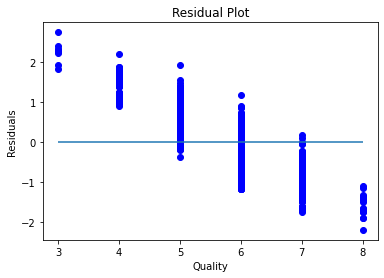

In [6]:
plt.scatter(Y, model.predict(X6) - Y, c="blue", label="Training Data")

plt.hlines(y=0, xmin=Y.min(), xmax=Y.max())
plt.title("Residual Plot")
plt.ylabel('Residuals')
plt.xlabel('Quality')

In [67]:
print('Coefficients: \n', model.coef_)
print(["fixed acidity, citric acid", "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide"
       ,"density","pH","sulphates","alcohol","c2","pH2","sugar2","alcoholsugar"])

Coefficients: 
 [ 2.75353190e-02  6.20822008e-01  2.46982371e-01 -2.62032650e+00
  6.03257510e-03 -4.15836003e-03 -4.59897405e+01  1.04978734e+01
  1.18681857e+00  1.84082345e-01 -2.07281823e-01 -1.63475845e+00
  4.12308435e-04  6.61384901e-03 -2.30438843e-02]
['fixed acidity, citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'c2', 'pH2', 'sugar2', 'alcoholsugar']


In [68]:
#cholrides very bad -2.6 coeficiant

X7 = sm.add_constant(X6)
est = sm.OLS(Y, X7)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     53.46
Date:                Thu, 29 Jul 2021   Prob (F-statistic):          4.25e-129
Time:                        19:27:55   Log-Likelihood:                -1599.0
No. Observations:                1599   AIC:                             3230.
Df Residuals:                    1583   BIC:                             3316.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   31.1854 